In [1]:
using PyPlot
using Distributions

INFO: Loading help data...


In [18]:
function lgc(x,half,slope,hi,lo)
    return lo + (hi-lo)./(1 + exp((half-x)/slope))
end

function gauss(x,a,b,c,d)
    return d + a*exp(-(x-b)^2 / (2*c^2))
end

function ret_v(x)
    return -0.2#-lgc(x,0.3,1,0.3,0.1)
end

function pause_v(x)
    return 0
end

function ant_v(x)
    return 0.2#-ret_v(-x)
end

function ret_prob(x)
    return lgc(x,0.3,1,0.3,0.1)
end

function ant_prob(x)
    return ret_prob(-x)
end
        
function pause_prob(x)
    return gauss(x,5,0,0.5,0.1)
end

function probabilities(x)
    p = zeros(3)
    p[1] = ret_prob(x)
    p[2] = pause_prob(x)
    p[3] = ant_prob(x)
    return p/sum(p)
end

function velocities(x)
    v = zeros(3)
    v[1] = ret_v(x)
    v[2] = pause_v(x)
    v[3] = ant_v(x)
    return v
end

function sample_velocity(x)
    p = probabilities(x)
    velocity_functions = [ret_v,pause_v,ant_v]
    ind = find(rand(Multinomial(1,p)))[1]
    return velocity_functions[ind](x)
end

sample_velocity (generic function with 1 method)

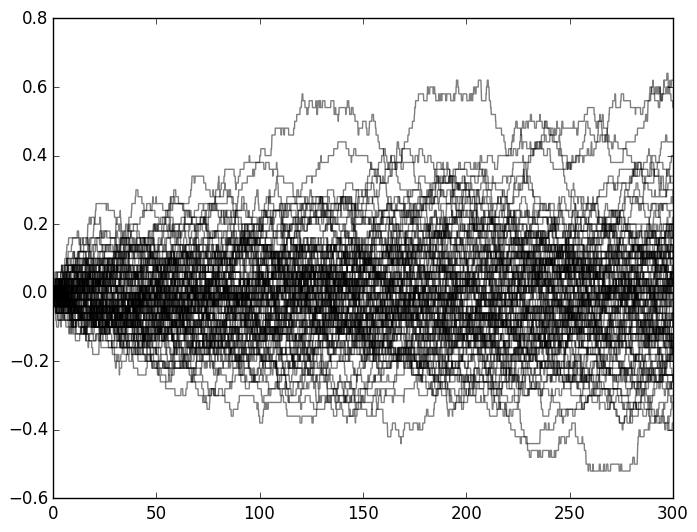

In [3]:
tmax = 300
dt = 0.1
t = 0:dt:tmax
n_t = length(t) # time points
N = 5000 # trials

x = zeros(n_t,N)

for j = 1:N
    for i = 2:n_t
        x[i,j] = x[i-1,j]+sample_velocity(x[i-1,j])*dt
    end
end

figure()
plot(t,x[:,1:100],"-k",alpha=0.5)
show()

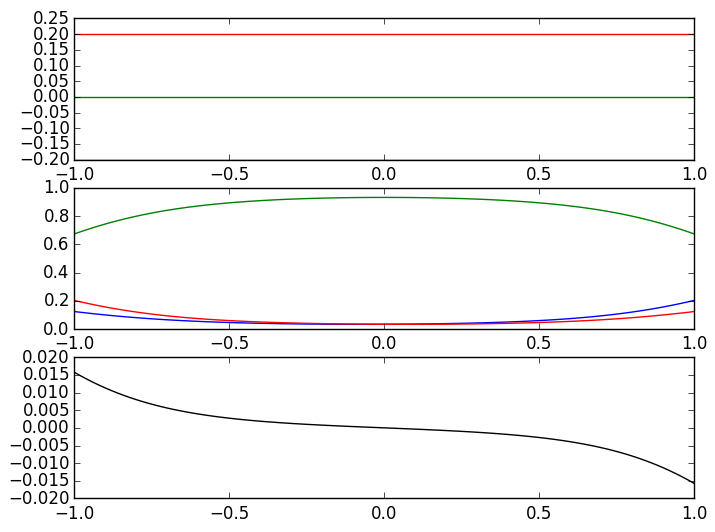

In [4]:
nn = 100
v = zeros(nn,3)
p = zeros(nn,3)
xx = linspace(-1,1,nn)
for i = 1:nn
    v[i,:] = velocities(xx[i])
    p[i,:] = probabilities(xx[i])
end

Ev = squeeze(sum(p.*v,2),2) # expected velocity

figure()
subplot(3,1,1)
plot(xx,v)
subplot(3,1,2)
plot(xx,p)
subplot(3,1,3)
plot(xx,Ev,"-k")
show()

In [5]:
n_compartments = 21
B = linspace(-1,1,n_compartments+1)
u = zeros(n_t,n_compartments) # concentration in each compartment

# calculate concentration in each compartment over time
for i = 1:n_t
    for k = 1:n_compartments
        u[i,k] = sum(B[k] .< x[i,:] .< B[k+1])/N
    end
end

# calculate expected velocity in each compartment
Evc = zeros(n_compartments)
for k = 1:n_compartments
    Evc[k] = mean(Ev[B[k] .< xx .< B[k+1]])
end

# calculate rate constants
a = zeros(n_compartments-1)
b = zeros(n_compartments-1)
for k = 1:(n_compartments-1)
    a[k]
end

In [19]:
lgc(Evc,0.,1.,1.,0.)

21-element Array{Float64,1}:
 0.503347
 0.502463
 0.50173 
 0.50125 
 0.500905
 0.500627
 0.500444
 0.500291
 0.500184
 0.500083
 0.5     
 0.499917
 0.499816
 0.499709
 0.499556
 0.499373
 0.499095
 0.49875 
 0.49827 
 0.497537
 0.496653

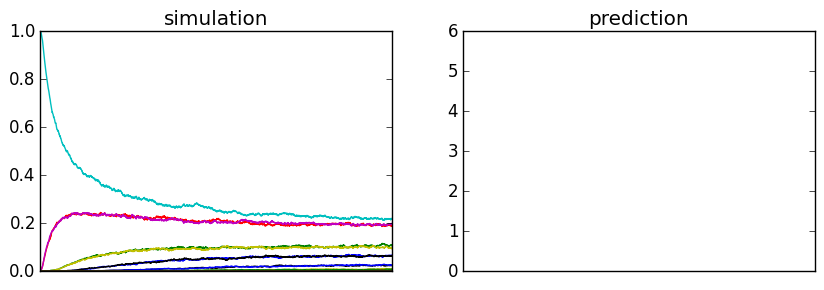

In [26]:
figure(figsize=(10,3))
subplot(1,2,1)
plot(t,u)
title("simulation")
xticks([])
subplot(1,2,2)
plot(u[end,2:end]./u[end,1:end-1])
title("prediction")
xticks([])
show()

In [27]:
u[end,2:end]./u[end,1:end-1]

1x20 Array{Float64,2}:
 NaN  NaN  Inf  4.0  5.75  2.41304  …  0.189189  0.285714  0.0  NaN  NaN

In [30]:
println()

[NaN NaN Inf 4.0 5.75 2.4130434782608696 2.990990990990991 1.5933734939759037 1.7712665406427222 1.1643543223052295 0.9110907424381302 0.4647887323943662 0.6774891774891776 0.4121405750798722 0.2868217054263566 0.18918918918918917 0.28571428571428575 0.0 NaN NaN]


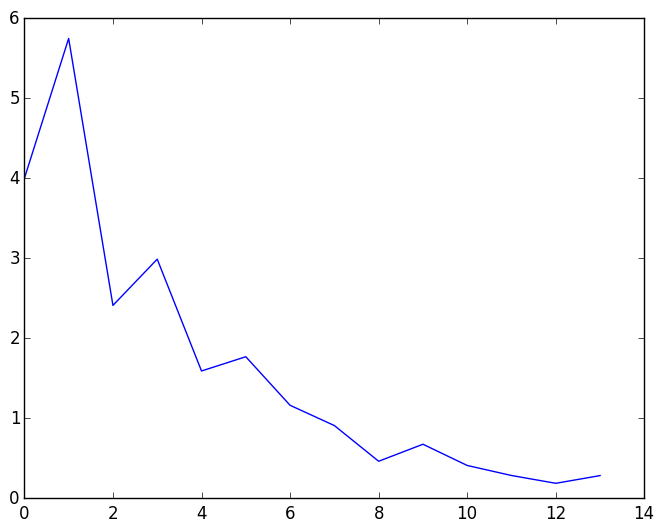

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f461364f550>

In [31]:
y = u[end,2:end]./u[end,1:end-1]
figure()
plot(y[4:end-3])